In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.ar_model import AutoReg

In [4]:
def parser(s):
    return pd.to_datetime(s).strftime("%Y-%m-%d")

In [5]:
productionIceCream = pd.read_csv('ice_cream.csv',parse_dates = [0],index_col = 0,squeeze = True,date_parser = parser)

C:\Users\91988\AppData\Local\Temp\ipykernel_18960\3170225064.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  productionIceCream = pd.read_csv('ice_cream.csv',parse_dates = [0],index_col = 0,squeeze = True,date_parser = parser)


In [6]:
productionIceCream.rename('production',inplace=True)

DATE
1972-01-01     59.9622
1972-02-01     67.0605
1972-03-01     74.2350
1972-04-01     78.1120
1972-05-01     84.7636
                ...   
2019-09-01    100.1741
2019-10-01     90.1684
2019-11-01     79.7223
2019-12-01     75.7094
2020-01-01     83.6290
Name: production, Length: 577, dtype: float64

In [7]:

productionIceCream = productionIceCream.asfreq(pd.infer_freq(productionIceCream.index))

In [8]:
startDate = pd.to_datetime('2010-01-01')
productionIceCream = productionIceCream[startDate:]

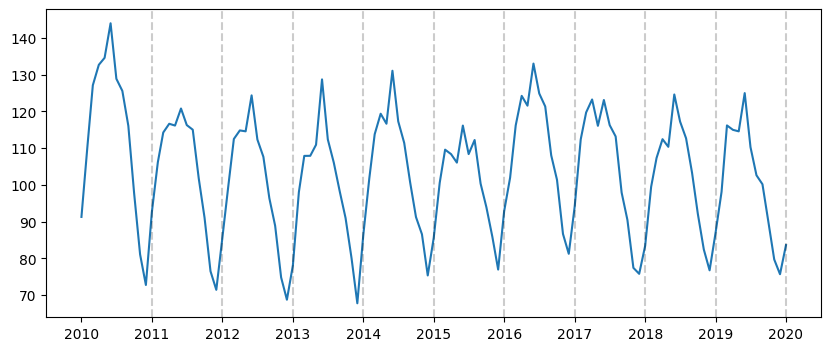

In [19]:
plt.figure(figsize = (10,4))
plt.plot(productionIceCream)
for year in range(2011,2021):
    plt.axvline(pd.to_datetime(f'{year}-01-01'),linestyle = '--',color = 'k',alpha = 0.2)

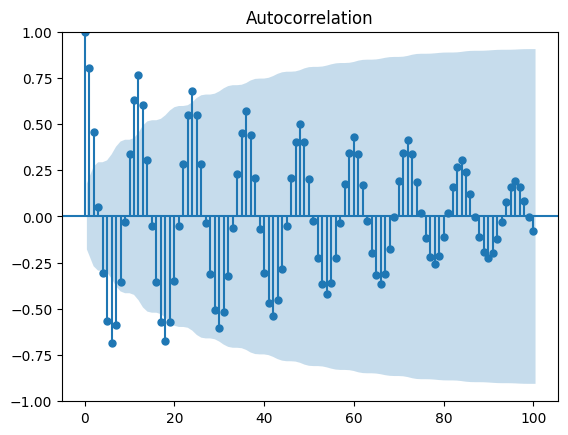

In [30]:
acfPlot = plot_acf(productionIceCream,lags = 100)

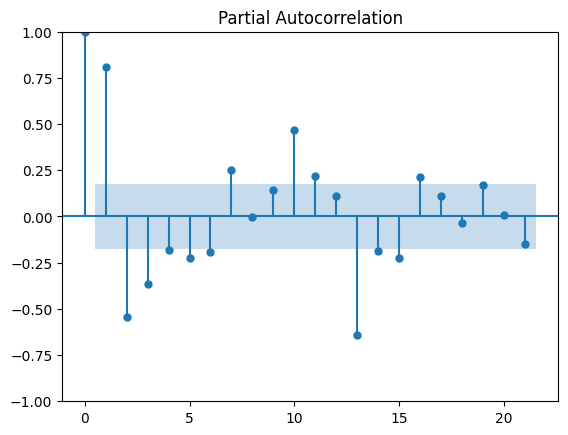

In [38]:
pacf_plot = plot_pacf(productionIceCream)

In [173]:
trainEnd = datetime(2016,12,1)
testEnd = datetime(2019,12,1)

trainData = productionIceCream[:trainEnd]
testData = productionIceCream[trainEnd + timedelta(days = 1) :]

In [174]:
model = ARIMA(trainData,order = (4,0,0))
# model = AutoReg(trainData,lags = 3)

In [175]:
modelFit = model.fit()

In [176]:
print(modelFit.summary())

                               SARIMAX Results                                
Dep. Variable:             production   No. Observations:                   84
Model:                 ARIMA(4, 0, 0)   Log Likelihood                -292.368
Date:                Wed, 08 Mar 2023   AIC                            596.737
Time:                        19:29:27   BIC                            611.322
Sample:                    01-01-2010   HQIC                           602.600
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        103.5324      2.035     50.880      0.000      99.544     107.521
ar.L1          0.9702      0.120      8.112      0.000       0.736       1.205
ar.L2         -0.0578      0.197     -0.294      0.7

In [177]:
predStartDate = testData.index[0]
print(predStartDate)

2017-01-01 00:00:00


In [178]:
predStartDate = testData.index[0]
predEndDate = testData.index[-1]

In [179]:
predictions = modelFit.predict(start = predStartDate,end = predEndDate)
residuals = testData - predictions

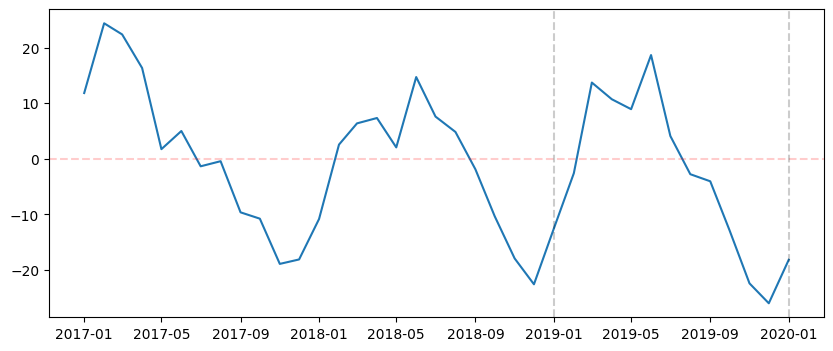

In [180]:
plt.figure(figsize = (10,4))
plt.plot(residuals)
plt.axhline(0,color = 'r',linestyle = '--',alpha = 0.2)
for year in range(2019,2021):
    plt.axvline(pd.to_datetime(f'{year}-01-01'),linestyle = '--',color = 'k',alpha = 0.2)

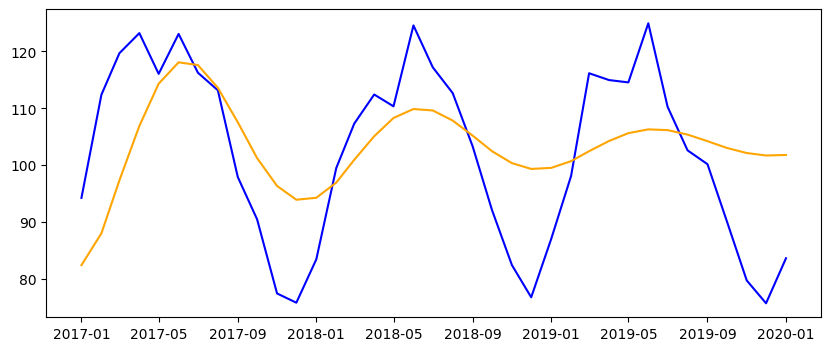

In [181]:
plt.figure(figsize = (10,4))
plt.plot(testData,color = 'blue')
plt.plot(predictions,color = 'orange')

In [182]:
print('Mean absolute percent error : ',round(np.mean(abs(residuals/testData)),4))

Mean absolute percent error :  0.1162


In [183]:
print('Root mean squared error : ',np.sqrt(np.mean(residuals**2)))

Root mean squared error :  13.250861159056978


In [184]:
predictionRolling = pd.Series(dtype = 'float64')
for endDate in testData.index:
    trainD = productionIceCream[:endDate - timedelta(days = 1)]    
    model =  ARIMA(trainD,order = (3,0,0))
    modelFit = model.fit()
    pred = modelFit.predict(endDate)
    predictionRolling[endDate] = pred
    

In [185]:
residualsRolling = testData - predictionRolling

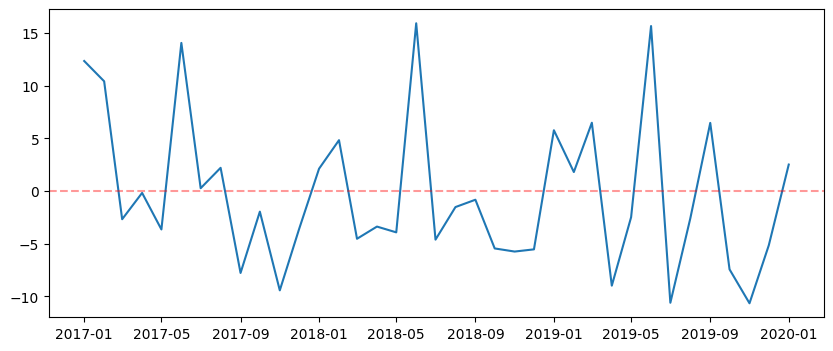

In [186]:
plt.figure(figsize = (10,4))
plt.plot(residualsRolling)
plt.axhline(0,color = 'red',linestyle = '--',alpha = 0.4)
# for year in range(2019,2021):
    # plt.axvline(pd.to_datetime(''))

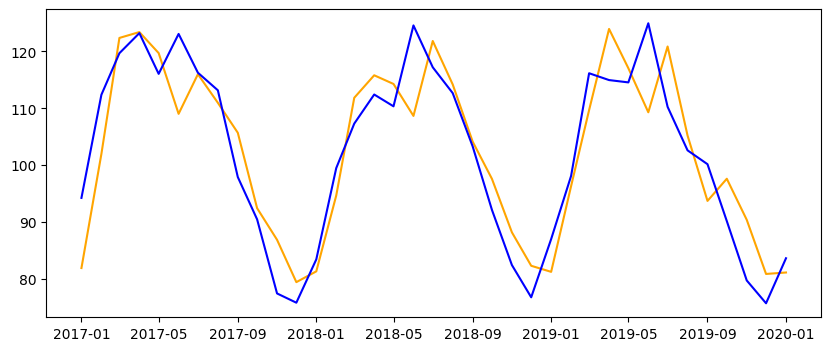

In [187]:
plt.figure(figsize = (10,4))
plt.plot(predictionRolling,color = 'orange')
plt.plot(testData,color = 'blue')

In [ ]:
print('Mean absolute percent error : ',round(np.mean(abs(residualsRolling/testData)),4))

In [190]:
print('Root mean squared error : ',np.sqrt(np.mean(residuals**2)))

Root mean squared error :  13.250861159056978
